In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train=pd.read_csv("train-val.csv")
print(train.shape)
train_labels=pd.read_csv("train-labels.csv")
train_labels.head()
train=train.merge(train_labels,on='id')
test=pd.read_csv("test.csv")
test.head()

(59400, 40)


id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

           ...          payment_type water_quality quality_group  \
0          ...             never pay          soft          good   
1          ...             never pay          soft          good   
2          ...             never pay          soft          good   
3          ...               unknown          soft          good   
4          ...               monthly          soft          good   

       quantity  quantity_group                source           source_type  \
0      seasonal        seasonal  rainwater harvesting  rainwater harvesting   
1  insufficient    insufficient                spring                spring   
2  insufficient    insufficient  rainwater harvesting  rainwater harvesting   
3           dry             dry          shallow well          shallow well   
4        enough          enough                spring                spring   

   source_class     waterpoint_type waterpoint_type_group  
0       surface               other                 other  
1   groundwater  communal standpipe    communal standpipe  
2       surface               other                 other  
3   groundwater               other                 other  
4   groundwater  communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [201]:
train.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

amount_tsh - Total static head (amount water available to waterpoint)

In [177]:
train.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

gps_height - Altitude of the well

In [178]:
train.gps_height.describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [179]:
train.installer.isnull().sum()

3655

In [180]:
cols=[]
for i in train.columns:
    if train[i].dtype=='object':
        cols.append(i)

In [181]:
import numpy as np
train.loc[train.funder=='0','funder']=np.nan
df=train.funder.value_counts()
vals=df[df<5].index
train.loc[train.funder.isin(vals),'funder']='limited'


train.installer.value_counts()
#Too many levels ignore this as wlel

In [182]:
cols_reqd=['basin','region','lga','ward','waterpoint_type_group','scheme_management','permit','waterpoint_type','extraction_type','extraction_type_group',
           'extraction_type_class','management','source_class','source_type','management_group','payment','payment_type','source','water_quality','quality_group']
df=(train.ward.value_counts())
val=(df[df<=20]).index
train.loc[train.ward.isin(val),'ward']='other'
len(train.ward.value_counts())

1038

In [162]:
numeric_cols=[]
for i in train.columns:
    if ((train[i].dtype=='int64') or (train[i].dtype=='float64')):
        numeric_cols.append(i)
numeric_cols


['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [163]:

mean_vals=train.groupby('region').longitude.mean().to_dict()
df=train.loc[train.longitude==0,'region'].apply(lambda x:mean_vals[x])
train.loc[df.index,'longitude']=df


In [183]:
from sklearn import preprocessing 
cols=[i for i in train.columns if i!='status_group' and i!='date_recorded' and i!='id']
train = train.fillna(" ")
test = test.fillna(" ")

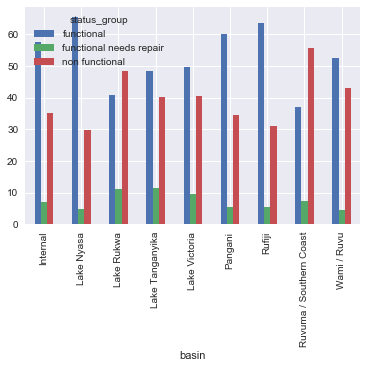

In [165]:
pd.crosstab(train.basin,train.status_group).apply(lambda x:100*x/sum(x),axis=1).plot(kind='bar')

In [166]:
train.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [184]:
ext_df=['cemo', 'other - play pump', 'walimi', 'climax',
       'other - mkulima/shinyanga']

train.loc[train.extraction_type.isin(ext_df),'extraction_type']='other-motor'
train.loc[train.extraction_type.isin(['india mark iii','india mark ii']),'extraction_type']='india mark'

In [185]:
from sklearn import preprocessing 
train = train.fillna(" ")
test = test.fillna(" ")

features_to_use=[]
for f in cols:
        if train[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train[f].values) + list(test[f].values))
            train[f] = lbl.transform(list(train[f].values))
            test[f] = lbl.transform(list(test[f].values))


In [186]:
import sys
sys.path.append("/Users/priya/xgboost/python-package")
import xgboost as xgb
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softmax'
    param['eta'] = 0.1
    param['max_depth'] = 7
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [187]:
train_X=train[cols]


target_num_map = {'functional':0, 'functional needs repair':1, 'non functional':2}
train_y=train.status_group.apply(lambda x:target_num_map[x])
train_X.head()

amount_tsh  funder  gps_height  installer  longitude   latitude  wpt_name  \
0      6000.0     737        1390       1707  34.938093  -9.856322     45683   
1         0.0     271        1399        611  34.698766  -2.147466     45426   
2        25.0     467         686       2297  37.460664  -3.821329     17767   
3         0.0     937         263       2079  38.486161 -11.155298     45537   
4         0.0    1032           0        134  31.130847  -1.825359     43411   

   num_private  basin  subvillage          ...            payment_type  \
0            0      1       13117          ...                       0   
1            0      4       17597          ...                       2   
2            0      5       10097          ...                       5   
3            0      7        9999          ...                       2   
4            0      4        8584          ...                       2   

   water_quality  quality_group  quantity  quantity_group  source  \
0              6              2         1               1       8   
1              6              2         2               2       5   
2              6              2         1               1       0   
3              6              2         0               0       3   
4              6              2         3               3       5   

   source_type  source_class  waterpoint_type  waterpoint_type_group  
0            6             0                1                      1  
1            3             1                1                      1  
2            1             1                2                      1  
3            0             0                2                      1  
4            3             1                1                      1  

[5 rows x 38 columns]

In [188]:
cv_scores = []
from sklearn import cross_validation, metrics 
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train_X.shape[0])):
        dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
        dev_y, val_y = train_y.iloc[dev_index], train_y.iloc[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        
        #cv_scores.append(log_loss(val_y, preds))
        #print(cv_scores)


[0]	train-mlogloss:1.04136	test-mlogloss:1.04242
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:0.989682	test-mlogloss:0.991804
[2]	train-mlogloss:0.941857	test-mlogloss:0.9453
[3]	train-mlogloss:0.900505	test-mlogloss:0.904849
[4]	train-mlogloss:0.864566	test-mlogloss:0.869627
[5]	train-mlogloss:0.833319	test-mlogloss:0.839283
[6]	train-mlogloss:0.805887	test-mlogloss:0.812481
[7]	train-mlogloss:0.781248	test-mlogloss:0.788773
[8]	train-mlogloss:0.759577	test-mlogloss:0.767852
[9]	train-mlogloss:0.739534	test-mlogloss:0.748508
[10]	train-mlogloss:0.722058	test-mlogloss:0.731513
[11]	train-mlogloss:0.706004	test-mlogloss:0.716112
[12]	train-mlogloss:0.692532	test-mlogloss:0.703127
[13]	train-mlogloss:0.679811	test-mlogloss:0.690774
[14]	train-mlogloss:0.668325	test-mlogloss:0.680104
[15]	train-mlogloss:0.657598	test-mlogloss:0.669922
[16]	train-mlogloss:0.647049	te

In [197]:
test_X=test.loc[:,cols]

preds, model = runXGB(train_X, train_y, test_X, num_rounds=440)
out_df = pd.DataFrame(preds)
out_df.head()

0
0  2.0
1  0.0
2  0.0
3  2.0
4  0.0

In [198]:
tgt= {0:'functional', 1:'functional needs repair', 2:'non functional'}
out_df.columns=['status_group']
out_df.status_group=out_df.status_group.apply(lambda x:int(x))
out_df['status_group']=out_df.status_group.apply(lambda x:tgt[x])
out_df['id']=test['id']
out_df.head()
out_df.to_csv("out.csv",columns=['id','status_group'],index=False)

In [199]:
232323232

232323232